In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
smart_dataset = pd.read_csv('/content/smart_meter_data.csv')

In [4]:
smart_dataset.shape

(5000, 7)

In [7]:
smart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             5000 non-null   object 
 1   Electricity_Consumed  5000 non-null   float64
 2   Temperature           5000 non-null   float64
 3   Humidity              5000 non-null   float64
 4   Wind_Speed            5000 non-null   float64
 5   Avg_Past_Consumption  5000 non-null   float64
 6   Anomaly_Label         5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [5]:
smart_dataset.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal


In [6]:
smart_dataset.isnull().sum()

,0
Timestamp,0
Electricity_Consumed,0
Temperature,0
Humidity,0
Wind_Speed,0
Avg_Past_Consumption,0
Anomaly_Label,0


In [9]:
smart_dataset['Timestamp'] = pd.to_datetime(smart_dataset['Timestamp'])

In [10]:
smart_dataset['Hour'] = smart_dataset['Timestamp'].dt.hour
smart_dataset['Day'] = smart_dataset['Timestamp'].dt.day
smart_dataset['Month'] = smart_dataset['Timestamp'].dt.month
smart_dataset['Weekday'] = smart_dataset['Timestamp'].dt.weekday


In [11]:
smart_dataset.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Hour,Day,Month,Weekday
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal,0,1,1,0
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal,0,1,1,0
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal,1,1,1,0
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal,1,1,1,0
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal,2,1,1,0


Encoding mengganti Anomali dan normal


In [12]:
smart_dataset['Anomaly_Label'] = smart_dataset['Anomaly_Label'].replace({'Normal':0, 'Anomaly':1})


In [13]:
smart_dataset.head()

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Hour,Day,Month,Weekday
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,0,0,1,1,0
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,0,0,1,1,0
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,0,1,1,1,0
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,0,1,1,1,0
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,0,2,1,1,0


<Axes: >

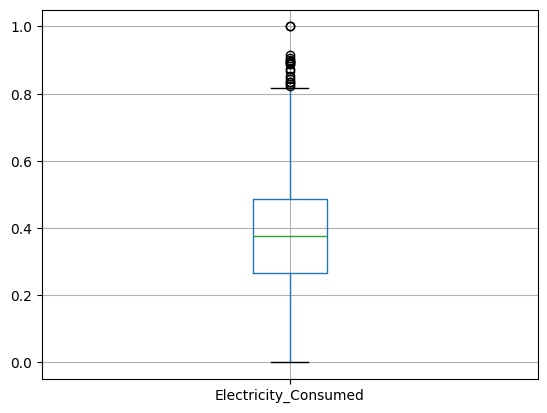

In [14]:
smart_dataset.boxplot(column=['Electricity_Consumed'])

In [17]:
Q1 = smart_dataset['Electricity_Consumed'].quantile(0.25)
Q3 = smart_dataset['Electricity_Consumed'].quantile(0.75)
IQR = Q3 - Q1

outliers = smart_dataset[(smart_dataset['Electricity_Consumed'] < Q1 - 1.5*IQR) |
              (smart_dataset['Electricity_Consumed'] > Q3 + 1.5*IQR)]


In [18]:
print(outliers)

               Timestamp  Electricity_Consumed  ...  Month  Weekday
179  2024-01-04 17:30:00              0.828362  ...      1        3
209  2024-01-05 08:30:00              1.000000  ...      1        4
478  2024-01-10 23:00:00              0.888147  ...      1        2
1615 2024-02-03 15:30:00              0.907185  ...      2        5
1957 2024-02-10 18:30:00              0.897958  ...      2        5
2035 2024-02-12 09:30:00              0.834943  ...      2        0
2305 2024-02-18 00:30:00              0.893320  ...      2        6
2506 2024-02-22 05:00:00              0.866516  ...      2        3
2521 2024-02-22 12:30:00              0.872543  ...      2        3
2801 2024-02-28 08:30:00              0.823839  ...      2        2
2895 2024-03-01 07:30:00              1.000000  ...      3        4
3241 2024-03-08 12:30:00              0.853067  ...      3        4
3716 2024-03-18 10:00:00              0.915515  ...      3        0
3982 2024-03-23 23:00:00              0.900343  

In [19]:
scaler = StandardScaler()

In [23]:
scaled_features = scaler.fit_transform(smart_dataset[['Temperature','Humidity','Wind_Speed',
                                                      'Avg_Past_Consumption']])

In [24]:
Y =smart_dataset['Electricity_Consumed']


In [25]:
Y = smart_dataset['Anomaly_Label']

In [29]:
X = smart_dataset[['Temperature','Humidity','Wind_Speed','Avg_Past_Consumption']]
y = smart_dataset['Anomaly_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [34]:
smart_dataset['Anomaly_Label'].unique()


array([0, 'Abnormal'], dtype=object)

In [35]:
smart_dataset['Anomaly_Label'].dtype


dtype('O')

In [36]:
array(['Normal', 'Anomaly'], dtype=object)


NameError: name 'array' is not defined